# Inventory Adjustment Analysis - EDA

### Import

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read data

In [2]:
file_path = "DoD_data/INV_ADJ_ANAL.xlsx"
df = pd.read_excel(file_path)

In [38]:
df

,COMMAND_CD,SITE_ID,ADJUSTMENT_CATEGORY,DESCRIPTION,DIVISION,LOB_DESC,DEPT_DESC,CLASS,SUB_CLASS,MERCHANDISING_YEAR,MERCHANDISING_PERIOD,PERIOD,TY_QTY,TY_VALUE,LY_QTY2,LY_VALUE2,LM_QTY3,LM_VALUE3
0,PNM,14100,Surveys,102-DAMAGED OR MISSING PARTS,Consumables,Non Alcoholic Bev,NON-ALCOHOLIC BEVERAGES,1400 - ENHANCED WATER,1407 - CLEAR GALLONS,2023,10,2023-10,0,0.00,1,3.99,0,0.00
1,PNM,14100,Surveys,102-DAMAGED OR MISSING PARTS,Consumables,Non Alcoholic Bev,NON-ALCOHOLIC BEVERAGES,1400 - ENHANCED WATER,1407 - CLEAR GALLONS,2024,5,2024-05,0,0.00,1,3.99,0,0.00
2,CPM,4100,Shrink,300-ON HAND CORRECTION,Consumables,Health Beauty Aids,HEALTH & BEAUTY AIDS,2100 - FOOT CARE,2102 - ANTIFUNGAL,2022,1,2022-01,-2,-5.98,0,0.00,0,0.00
3,SDM,9300,Surveys,102-DAMAGED OR MISSING PARTS,Consumables,Non Alcoholic Bev,NON-ALCOHOLIC BEVERAGES,1400 - ENHANCED WATER,1407 - CLEAR GALLONS,2023,9,2023-09,0,0.00,1,3.99,0,0.00
4,CLM,5304,Surveys,102-DAMAGED OR MISSING PARTS,Consumables,Non Alcoholic Bev,NON-ALCOHOLIC BEVERAGES,1400 - ENHANCED WATER,1407 - CLEAR GALLONS,2023,12,2023-12,0,0.00,0,0.00,1,6.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578197,SCM,18101,Reconciliation,303-PHYSICAL INV RECONCILIATION,Consumables,Health Beauty Aids,HEALTH & BEAUTY AIDS,1000 - BABY CARE,1005 - BABY CARE,2024,12,2024-12,0,0.00,-2,570.22,0,0.00
578198,PNM,10321,Shrink,300-ON HAND CORRECTION,Consumables,Stationery,STATIONERY SUPPLIES,1700 - PAPER PRODUCTS,1705 - INDEX CARDS,2024,12,2024-12,0,0.00,0,0.20,0,0.00
578199,CLM,5202,Surveys,101-EXPIRED,Consumables,Health Beauty Aids,HEALTH & BEAUTY AIDS,3500 - VITAMINS / DIET / SUPPLEMENTS,3505 - OTHERS,2023,8,2023-08,4,7.68,0,0.00,0,0.00
578200,CLM,5300,Surveys,101-EXPIRED,Consumables,Health Beauty Aids,HEALTH & BEAUTY AIDS,3500 - VITAMINS / DIET / SUPPLEMENTS,3505 - OTHERS,2022,2,2022-02,10,7.40,0,0.00,5,24.95


### Basic statistics

In [4]:
df.shape

(578202, 18)

In [5]:
df.columns

Index(['COMMAND_CD', 'SITE_ID', 'ADJUSTMENT_CATEGORY', 'DESCRIPTION',
       'DIVISION', 'LOB_DESC', 'DEPT_DESC', 'CLASS', 'SUB_CLASS',
       'MERCHANDISING_YEAR', 'MERCHANDISING_PERIOD', 'PERIOD', 'TY_QTY',
       'TY_VALUE', 'LY_QTY2', 'LY_VALUE2', 'LM_QTY3', 'LM_VALUE3'],
      dtype='object')

In [6]:
df.dtypes

COMMAND_CD               object
SITE_ID                   int64
ADJUSTMENT_CATEGORY      object
DESCRIPTION              object
DIVISION                 object
LOB_DESC                 object
DEPT_DESC                object
CLASS                    object
SUB_CLASS                object
MERCHANDISING_YEAR        int64
MERCHANDISING_PERIOD      int64
PERIOD                   object
TY_QTY                    int64
TY_VALUE                float64
LY_QTY2                   int64
LY_VALUE2               float64
LM_QTY3                   int64
LM_VALUE3               float64
dtype: object

In [7]:
# summary statistics for non categorical data
df.describe()

,SITE_ID,MERCHANDISING_YEAR,MERCHANDISING_PERIOD,TY_QTY,TY_VALUE,LY_QTY2,LY_VALUE2,LM_QTY3,LM_VALUE3
count,578202.000000,578202.000000,578202.000000,5.782020e+05,5.782020e+05,5.782020e+05,5.782020e+05,5.782020e+05,5.782020e+05
mean,10302.249306,2022.907539,6.806305,-4.269150e+00,5.611069e+00,-4.273852e+00,5.594672e+00,-4.269150e+00,5.611069e+00
std,7393.540936,0.717590,3.569258,3.945888e+03,7.290181e+03,3.945888e+03,7.290180e+03,3.945888e+03,7.290181e+03
min,1100.000000,2022.000000,1.000000,-3.000000e+06,-3.870000e+06,-3.000000e+06,-3.870000e+06,-3.000000e+06,-3.870000e+06
25%,5202.000000,2022.000000,4.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,10332.000000,2023.000000,7.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,13314.000000,2023.000000,10.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,70001.000000,2024.000000,12.000000,3.041400e+04,3.938227e+06,3.041400e+04,3.938227e+06,3.041400e+04,3.938227e+06


### Correlation heatmap

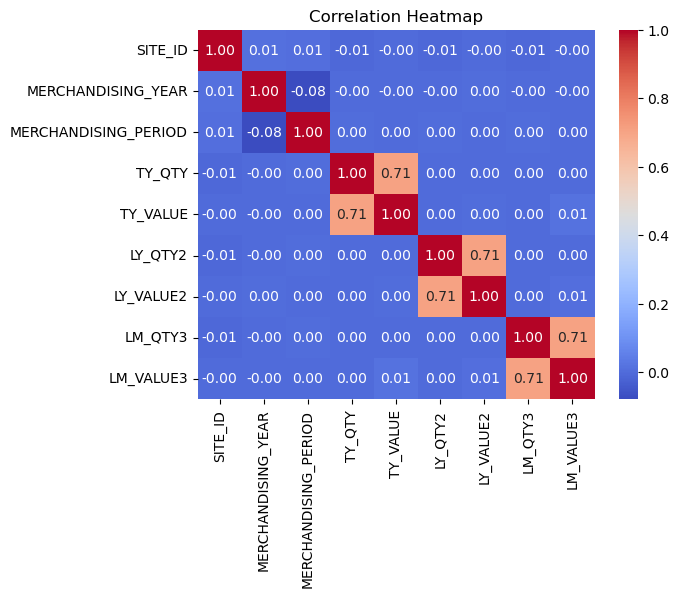

In [78]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

### Individual features and Visualization

#### COMMAND_CD (Command code)

In [8]:
df['COMMAND_CD'].value_counts()

PNM     116688
CLM      99860
TWM      80427
MRM      44469
QUM      43625
KBM      39087
SCM      35348
IWM      31725
CPM      26959
HHM      20653
SDM      17149
ELM      11965
ALM       4718
RDCW      3498
RDCE      2031
Name: COMMAND_CD, dtype: int64

In [10]:
# number of categories
len(df['COMMAND_CD'].value_counts())

15

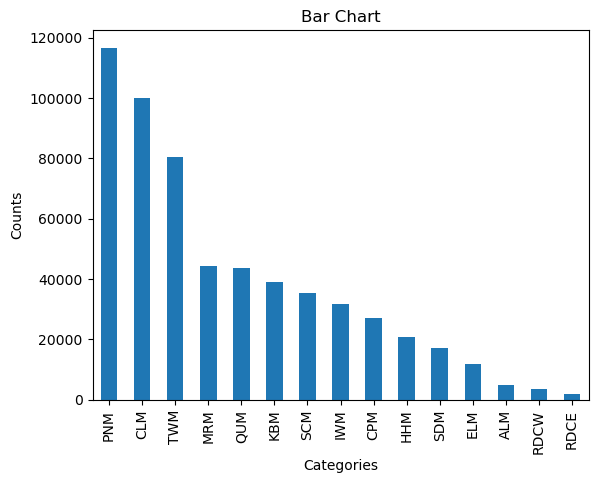

In [11]:
# Plotting the bar chart
series = df['COMMAND_CD'].value_counts()
series.plot(kind='bar')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Chart')

# Show the plot
plt.show()

#### SITE_ID (Site ID)

In [12]:
df['SITE_ID'].value_counts()

13100    43610
11100    32149
10101    24042
5100     22986
15100    20704
         ...  
5311        24
2802        24
10364       12
16107        3
5020         3
Name: SITE_ID, Length: 126, dtype: int64

In [20]:
df['SITE_ID'].unique()

array([14100,  4100,  9300,  5304,  5102, 13100,  2301,  2500, 13307,
       13306, 15301, 15200,  4200, 18301,  4300,  5100,  5211, 18100,
       14301, 11301, 10118, 14400, 15305,  5207,  5202,  5305,  5309,
        5301,  2305,  2205, 15100,  3100, 10322, 10352,  5201, 10333,
       10101,  5310,  5315,  5209, 14302,  5314, 18703, 16101, 15306,
        1100, 11100, 10321, 10332, 11300, 12100, 18101,  8100,  2100,
       10324, 10251, 13314,  9700, 10362, 13305,  5001, 10320,  1500,
        2202, 15400,  5316, 10314, 16300, 10353, 15303, 16001, 11200,
       10326,  2309,  9100,  5303,  5302, 10113, 10341, 10343,  2801,
        1200,  5311, 10500, 10323, 16020, 10451,  9301, 16301, 70001,
       13380, 10344,  5500, 13379,  2304, 12300,  5306, 10413,  5300,
        2800, 10303,  2211, 12301, 10325, 10304, 16002, 10397, 10399,
        5398,  5020, 10230, 60001, 10252, 18303, 15001,  2802, 10003,
       10700,  4399, 10364, 13399,  2302, 16107, 10398,  5206, 10001])

In [13]:
# number of categories
len(df['SITE_ID'].value_counts())

126

In [14]:
# Pareto
int(len(df['SITE_ID'].value_counts())*0.2)

25

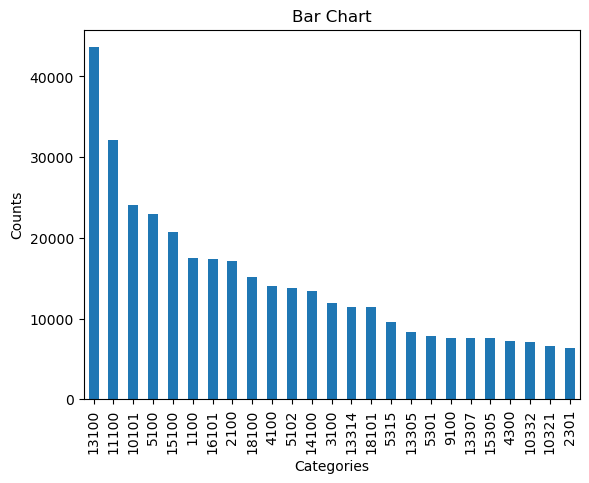

In [15]:
# Plotting the bar chart
series = df['SITE_ID'].value_counts()[:25]
series.plot(kind='bar')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Chart')

# Show the plot
plt.show()

#### ADJUSTMENT_CATEGORY

In [21]:
df['ADJUSTMENT_CATEGORY'].value_counts()

Surveys           285303
Shrink            247662
All Other          33673
Reconciliation     11564
Name: ADJUSTMENT_CATEGORY, dtype: int64

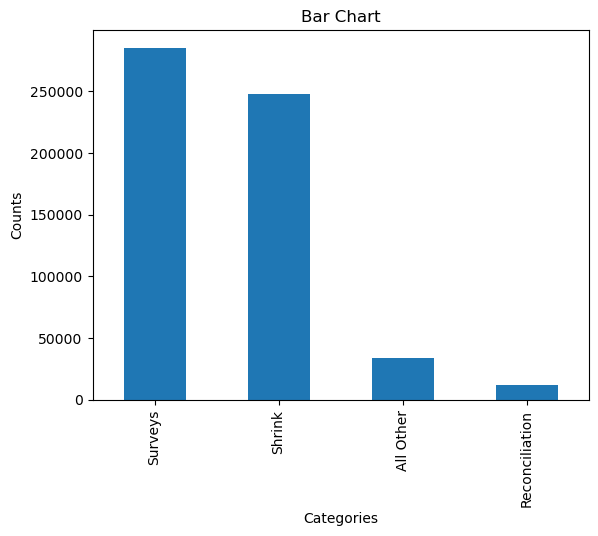

In [22]:
# Plotting the bar chart
series = df['ADJUSTMENT_CATEGORY'].value_counts()
series.plot(kind='bar')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Chart')

# Show the plot
plt.show()

#### DESCRIPTION

In [23]:
df['DESCRIPTION'].value_counts()

300-ON HAND CORRECTION             182916
102-DAMAGED OR MISSING PARTS       160009
101-EXPIRED                        103170
301-CYCLE COUNT                     45184
555-RDC Transfer Discrepancy        24743
103-RETURNED UNSELLABLE             16195
302-KNOWN THEFT                     14226
303-PHYSICAL INV RECONCILIATION     11564
106-STORE USE                        8076
104-HQ DIRECTED WRITEOFF             5929
1-OPERATIONAL                        5336
222-MILITARY CLOTHING DRMO            854
Name: DESCRIPTION, dtype: int64

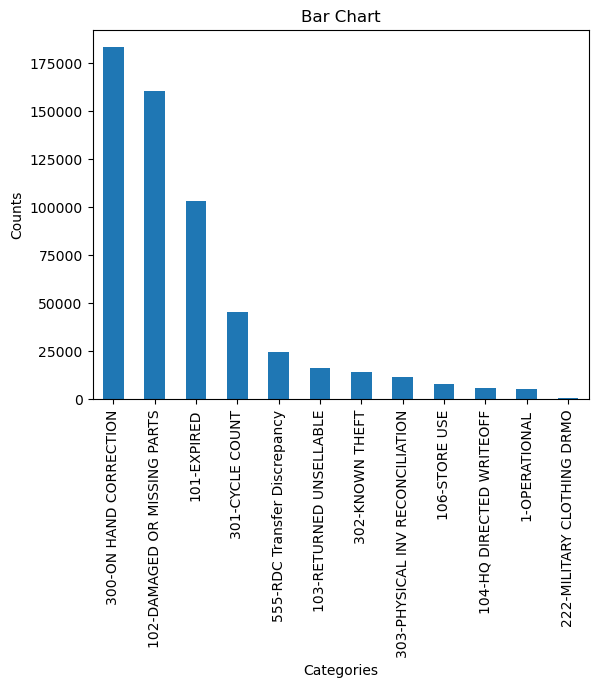

In [24]:
# Plotting the bar chart
series = df['DESCRIPTION'].value_counts()
series.plot(kind='bar')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Chart')

# Show the plot
plt.show()

#### DIVISION

In [25]:
df['DIVISION'].value_counts()

Consumables      405493
Hardlines         84979
Softlines         63779
Comm Military     23622
NON-RMS             201
Retail              122
Services              6
Name: DIVISION, dtype: int64

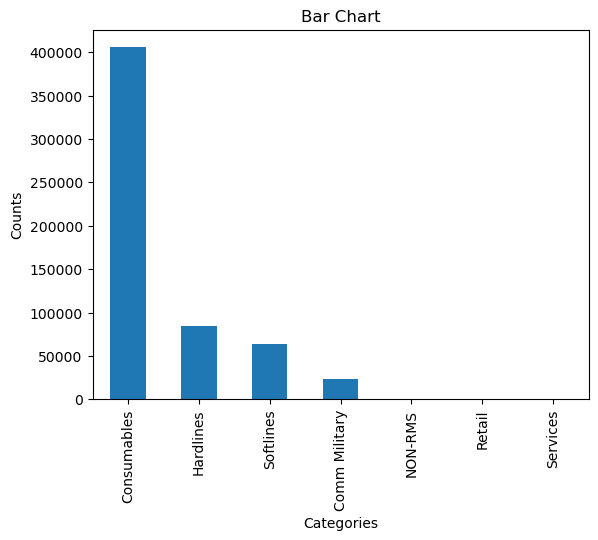

In [26]:
# Plotting the bar chart
series = df['DIVISION'].value_counts()
series.plot(kind='bar')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Chart')

# Show the plot
plt.show()

#### LOB_DESC

In [27]:
df['LOB_DESC'].value_counts()

Food                   153713
Health  Beauty Aids     65975
Non Alcoholic Bev       52398
Cleaning                20848
Sporting Goods          19177
Cosmetics               17459
Sports Nutrition        14919
Tobacco                 14333
Stationery              13432
Spirits                 11567
Accessories/Jewelry     10597
Housewares              10463
Shoes                   10193
Commercial Uniform       9967
Beer and Ale             9894
Young Mens               9530
Military Logo            9357
Mens                     8556
Gifts & Home Decor       8008
Hardware                 7314
Toys                     7269
Womens                   7249
Childrens                6956
Mass Cosmetics           6650
Computers                6443
Domestics                5974
Video/Audio              5725
Outdoor                  5198
Communication            5106
Pets                     4926
Small Electrics          4778
Intimate Apparel         4753
Auto Accessories         4582
Wine      

In [32]:
len(df['LOB_DESC'].unique())

51

In [29]:
# Pareto
int(len(df['LOB_DESC'].value_counts())*0.2)

10

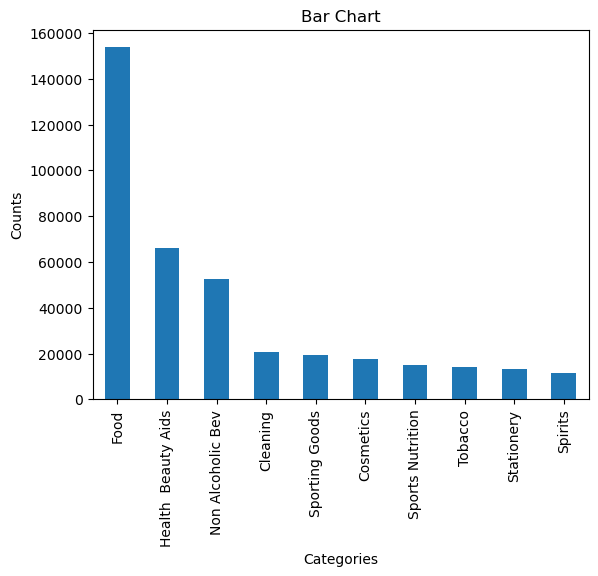

In [30]:
# Plotting the bar chart
series = df['LOB_DESC'].value_counts()[: 10]
series.plot(kind='bar')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Chart')

# Show the plot
plt.show()

#### DEPT_DESC

In [33]:
df['DEPT_DESC'].value_counts()

DRY GROCERY                        88921
HEALTH & BEAUTY AIDS               65975
NON-ALCOHOLIC BEVERAGES            43693
CANDY                              22328
Cleaning Supplies                  20848
                                   ...  
ALEXANDRE OF LONDON                    3
SOMA                                   3
LAUNDRY / DRY CLEANING / TAILOR        3
FOOD AND BEVERAGE                      3
PRE-RECORDED A/V                       3
Name: DEPT_DESC, Length: 164, dtype: int64

In [35]:
len(df['DEPT_DESC'].unique())

165

In [36]:
# Pareto
int(len(df['DEPT_DESC'].value_counts())*0.2)

32

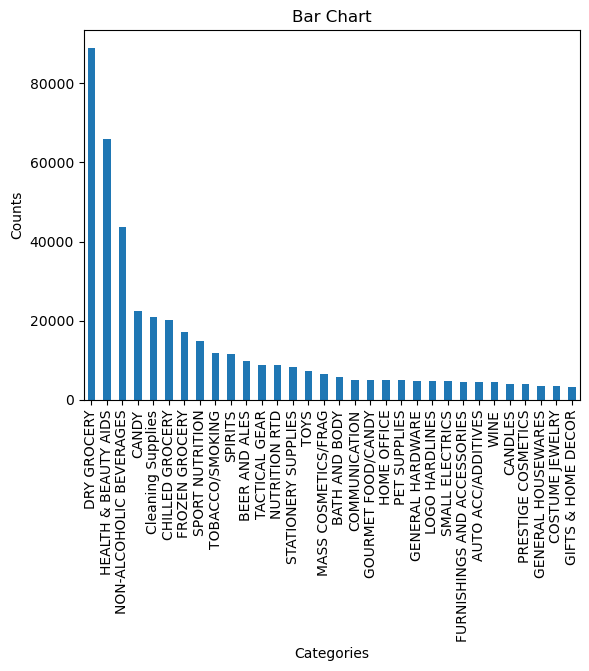

In [37]:
# Plotting the bar chart
series = df['DEPT_DESC'].value_counts()[: 32]
series.plot(kind='bar')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Chart')

# Show the plot
plt.show()

#### CLASS

In [46]:
df['CLASS'].value_counts()

1000 - CHILLED GROCERY               20112
1000 - FROZEN GROCERY                17086
1000 - ENERGY                        13422
1500 - NUTS & SEEDS                  11273
2100 - WAREHOUSE SALTY SNACKS        10076
                                     ...  
1800 - SEPARATE TRIANGLE TOP             3
1100 - SURFBOARDS AND ACCESSORIES        3
1700 - FRUIT VARIETAL                    3
4900 - BUXOM                             3
2100 - MISCELLANEOUS                     3
Name: CLASS, Length: 1278, dtype: int64

In [48]:
len(df['CLASS'].unique())

1278

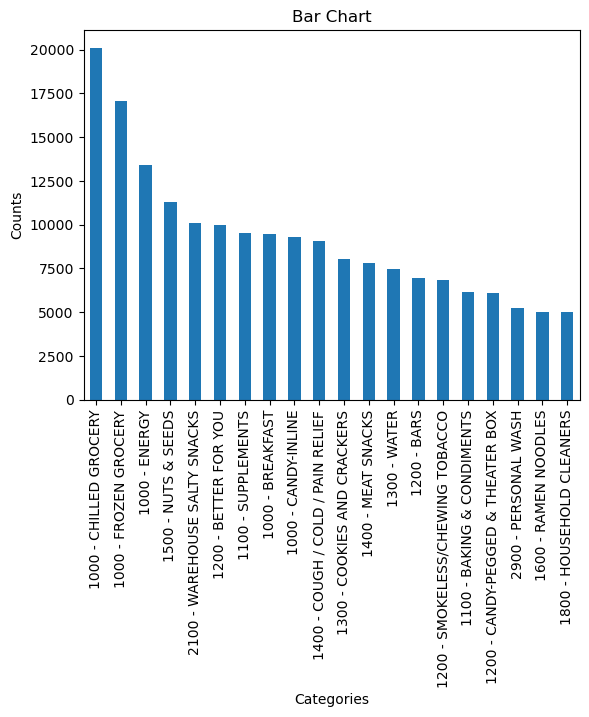

In [50]:
# Plotting the bar chart
series = df['CLASS'].value_counts()[: 20]
series.plot(kind='bar')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Chart')

# Show the plot
plt.show()

#### SUB_CLASS

In [39]:
df['SUB_CLASS'].value_counts()

2105 - OTHER WH SALTY SNACKS    5289
1201 - PEGGED CANDY             5079
1005 - FROZEN MEALS             4651
1010 - DAIRY                    4413
2201 - BAKERY                   4365
                                ... 
1728 - SAMBUCA                     3
1425 - SANGRIA                     2
1518 - SAUVIGNON BLANC             2
1007 - CHESTS/DRAWERS              2
7108 - COLLATERAL                  2
Name: SUB_CLASS, Length: 4877, dtype: int64

In [40]:
len(df['SUB_CLASS'].unique())

4877

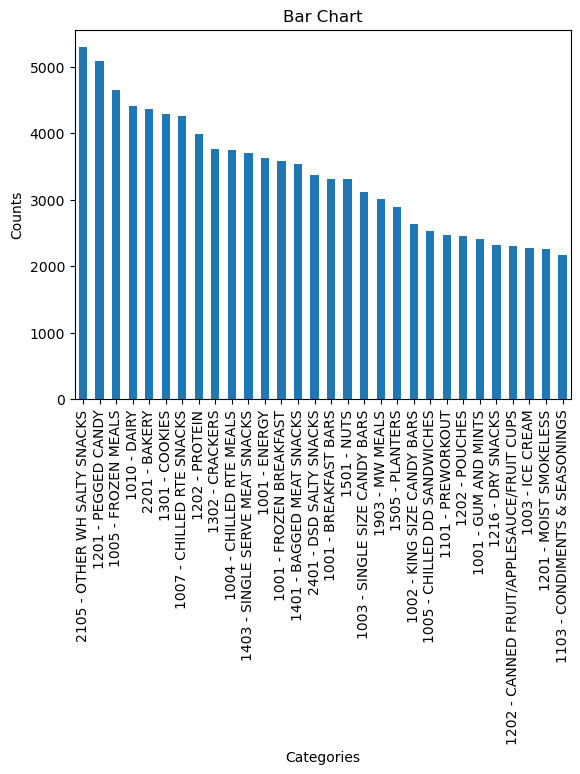

In [45]:
# Plotting the bar chart
series = df['SUB_CLASS'].value_counts()[: 30]
series.plot(kind='bar')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Chart')

# Show the plot
plt.show()

#### MERCHANDISING_YEAR

In [51]:
df['MERCHANDISING_YEAR'].value_counts()

2023    275523
2022    178070
2024    124609
Name: MERCHANDISING_YEAR, dtype: int64

- 2023 consists of 47.65% of the data 

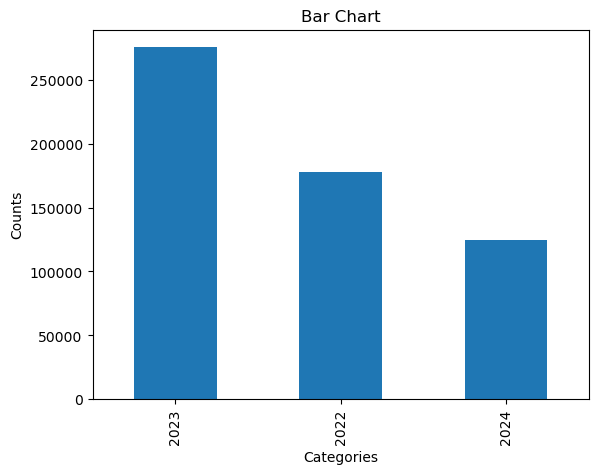

In [57]:
# Plotting the bar chart
series = df['MERCHANDISING_YEAR'].value_counts()
series.plot(kind='bar')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Chart')

# Show the plot
plt.show()

#### MERCHANDISING_PERIOD

In [53]:
df['MERCHANDISING_PERIOD'].value_counts()

12    63677
11    61483
8     50074
1     48687
9     46722
2     46575
6     45797
5     45237
10    43759
7     43572
3     41982
4     40637
Name: MERCHANDISING_PERIOD, dtype: int64

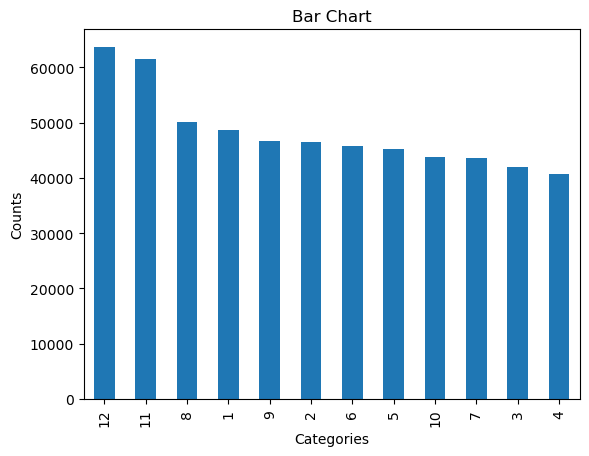

In [56]:
# Plotting the bar chart
series = df['MERCHANDISING_PERIOD'].value_counts()
series.plot(kind='bar')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Chart')

# Show the plot
plt.show()

#### PERIOD

In [55]:
df['PERIOD'].value_counts()

2023-12    30461
2023-11    28970
2023-08    23716
2023-09    22478
2023-06    21973
2023-05    21888
2023-01    21843
2023-02    21813
2023-07    21500
2022-12    20744
2023-03    20672
2023-10    20453
2023-04    19756
2024-01    19191
2022-11    18910
2022-09    16526
2022-08    16102
2022-10    15040
2022-06    14709
2022-05    14237
2022-02    14189
2022-07    14119
2024-11    13603
2022-03    13437
2024-12    12472
2022-04    12404
2024-02    10573
2024-08    10256
2024-06     9115
2024-05     9112
2024-04     8477
2024-10     8266
2024-07     7953
2024-03     7873
2024-09     7718
2022-01     7653
Name: PERIOD, dtype: int64

In [60]:
df['PERIOD'].unique()

array(['2023-10', '2024-05', '2022-01', '2023-09', '2023-12', '2022-09',
       '2023-06', '2024-10', '2022-08', '2022-11', '2023-04', '2023-07',
       '2022-06', '2022-04', '2024-03', '2022-02', '2023-02', '2024-04',
       '2024-01', '2022-12', '2023-03', '2023-01', '2023-05', '2024-07',
       '2022-05', '2022-03', '2022-07', '2023-08', '2024-08', '2023-11',
       '2024-09', '2022-10', '2024-12', '2024-11', '2024-02', '2024-06'],
      dtype=object)

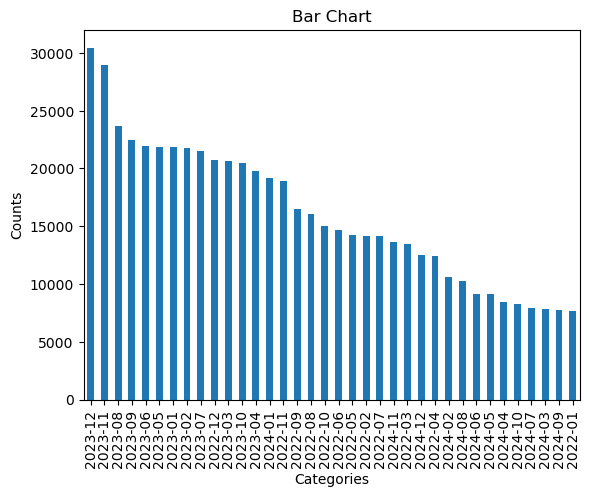

In [58]:
# Plotting the bar chart
series = df['PERIOD'].value_counts()
series.plot(kind='bar')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Chart')

# Show the plot
plt.show()

- Last two periods of 2023 have appearantly higher adjustments

- Can further drill into this by breaking down the 2023 data

### TO BE CONTINUED

In [70]:
df['TY_QTY'].describe()

count    5.782020e+05
mean    -4.269150e+00
std      3.945888e+03
min     -3.000000e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.041400e+04
Name: TY_QTY, dtype: float64

<AxesSubplot:>

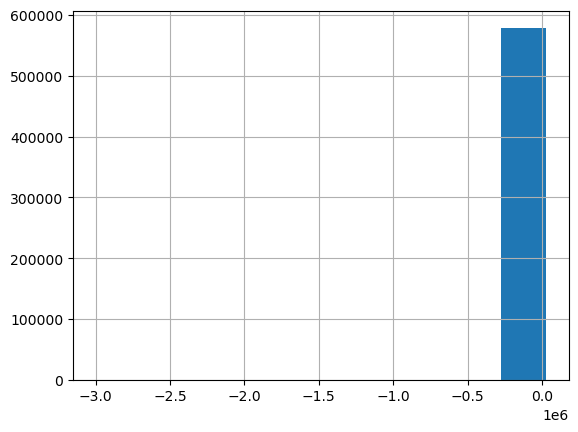

In [77]:
df['TY_QTY'].hist()

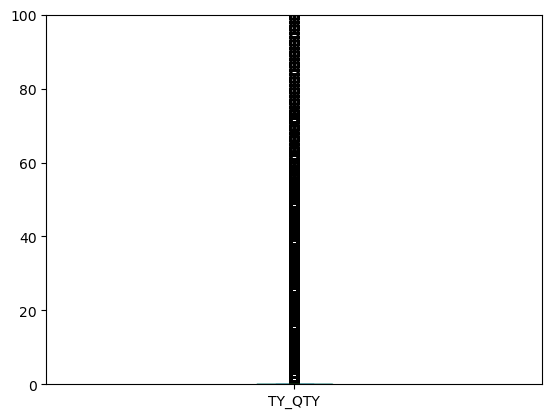

In [75]:
# Draw the box plot
ax = df['TY_QTY'].plot(kind='box')

# Adjust the scale of the y-axis
ax.set_ylim(0, 100)  # Set the limits of the y-axis

# Display the plot
plt.show()